# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

Exemplo

In [1]:
import torch
from torch import nn
from torchvision import models

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Exemplo

In [2]:
def max_grad(model):
    """Máximo valor de gradiente de cada parâmetro."""

    stats = {}
    # model.named_parameters() retorna os nomes e respectivos parâmetros do
    # modelo
    for param_name, param in model.named_parameters():
        grad = param.grad
        g_max = grad.max()
        stats[param_name] = {'g_max':g_max.item()}

    return stats

# Aplica o modelo
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

max_grad(model)

{'conv1.weight': {'g_max': 0.0007303889724425972},
 'bn1.weight': {'g_max': 0.0004913343000225723},
 'bn1.bias': {'g_max': 0.00019401212921366096},
 'layer1.0.conv1.weight': {'g_max': 0.00021663443476427346},
 'layer1.0.bn1.weight': {'g_max': 0.00021914768149144948},
 'layer1.0.bn1.bias': {'g_max': 0.00019595323828980327},
 'layer1.0.conv2.weight': {'g_max': 0.0001266567560378462},
 'layer1.0.bn2.weight': {'g_max': 0.00029293130501173437},
 'layer1.0.bn2.bias': {'g_max': 0.00016393844271078706},
 'layer1.1.conv1.weight': {'g_max': 0.0001290913496632129},
 'layer1.1.bn1.weight': {'g_max': 0.00023368428810499609},
 'layer1.1.bn1.bias': {'g_max': 0.00025101983919739723},
 'layer1.1.conv2.weight': {'g_max': 0.00011793126031989232},
 'layer1.1.bn2.weight': {'g_max': 0.00020304074860177934},
 'layer1.1.bn2.bias': {'g_max': 0.00014431358431465924},
 'layer2.0.conv1.weight': {'g_max': 0.0001639608817640692},
 'layer2.0.bn1.weight': {'g_max': 0.0003870298096444458},
 'layer2.0.bn1.bias': {'g_ma

# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

### Resolução 

**1.** Função que recebe como entrada uma rede neural e retorna um dicionário contendo como chave o nome do parametro do modelo e o maior e menor valor dos parâmetros, bem como dos gradientes dos parêmetros.

In [1]:
import torch
from torch import nn
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import train
import modelstats

In [2]:
seed = 42
torch.manual_seed(seed)
#np.random.seed(seed)

# Criação de um modelo e cálculo dos gradientes como no notebook original
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

In [5]:
# --> modelstats.py
stats = modelstats.get_model_stats(model)

# stats

**2.** Função que recebe o dicionário e retorna o valor máximo e mínimo dos parâmetros e gradientes dos parâmetros

In [2]:
# --> modelstats.py
four_stats = modelstats.get_four_stats(model)

# four_stats

**3.** 

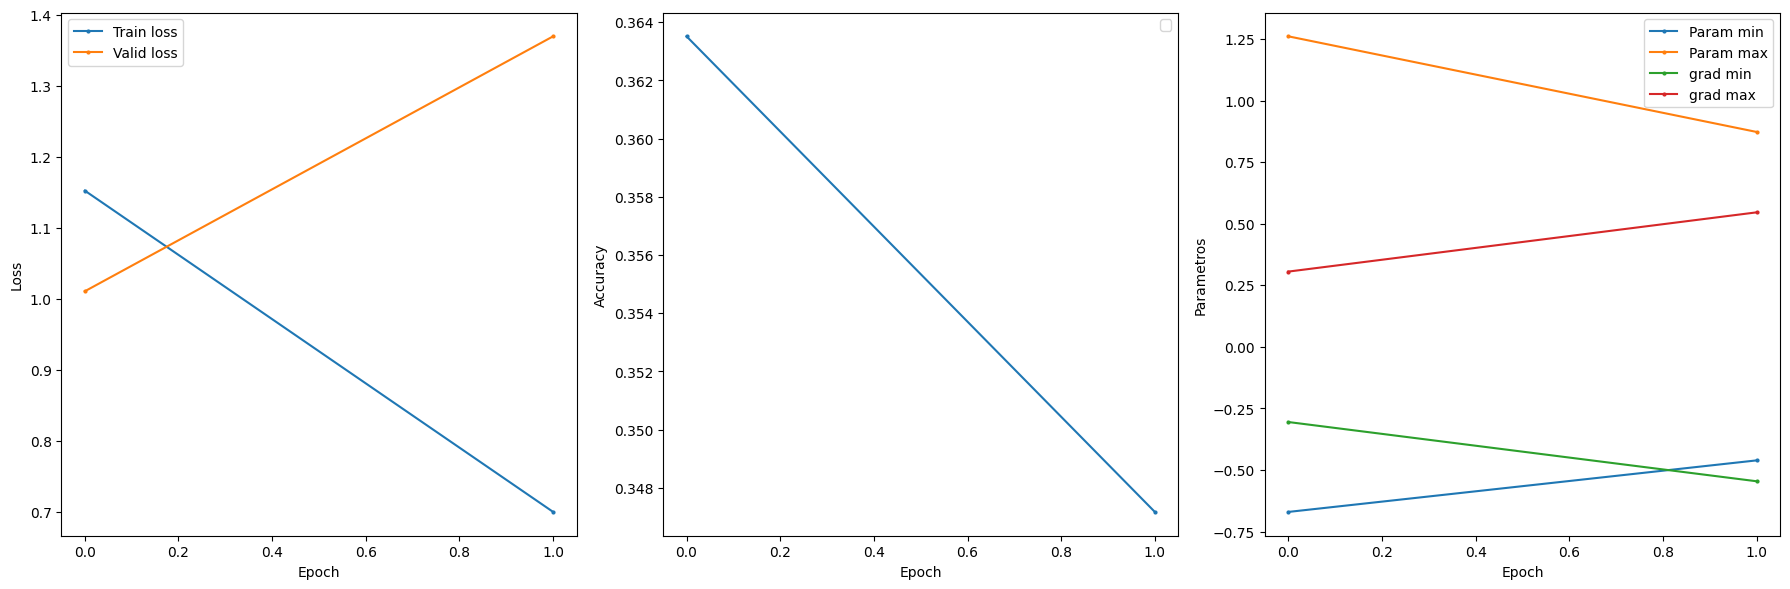

In [1]:
import torch
from torch import nn
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import train
import modelstats

params = {
    #'bs':64,
    'bs':32,
    'num_epochs':100,
    'lr':0.01,
    'weight_decay':1e-2,
    'resize_size':4,  # Tamanho das imagens de treinamento
    'seed':0
}

model = models.resnet18()
# Modifica a última camada do modelo para classificar em 2 classes
model.fc = nn.Linear(model.fc.in_features, 2)
ds_train, ds_valid, logger = train.train(model, **params)
# Cada época demora em torno de 6.1 segundos em uma RTX3080 Ti

1


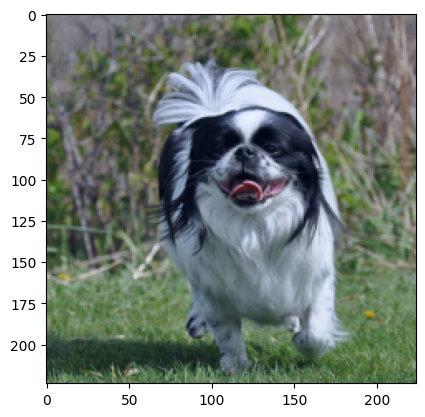

In [ ]:
img, label = ds_valid[1000]

plt.imshow(img)
print(label)

gato


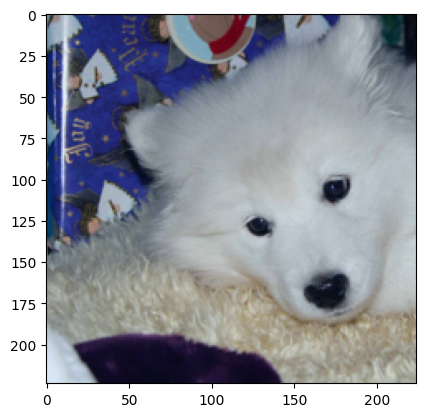

In [ ]:
img, label = ds_valid[20]
img = img.unsqueeze(0)
img = img.to('cuda')
res = model(img)
animal = torch.argmax(res)

def trata_imagem(img: torch.Tensor) -> np.ndarray:
    # remove dimensao do batch
    img = img[0]
    
    # trata a imagem
    img -= img.min()
    img /= img.max()
    img *= 255
    img = img.to(torch.uint8)
    img = img.swapaxes(0, 1).swapaxes(1, 2)
    
    if img.is_cuda:
        img = img.detach().cpu()
    else:
        img = img.detach()
    
    return img.numpy()

# animal = 'gato' if animal==1 else 'cachorro'
if animal == 1:
    animal = 'gato'
else:
    animal = 'cahorro'

img = trata_imagem(img)
print(animal)
plt.imshow(img)